# Precipitation exercises
***

## <font color=steelblue>Exercise 2 - Double-mass curve<br>

<font color=steelblue>The table *2MassCurve* in the file *RainfallData.xlsx* provides annual precipitation measured over a 17-yr period at five gages in a region. Gage C was moved at the end of 1974. Carry out a double-mass curve analysis to check for consistency in the record of that gage C, and make appropriate adjustments to correct for any inconsistencies.</font>

In [2]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')

## Introduction
A **double mass curve** is a plot of the cumulative data of one variable against the cumulative data of another variable (or against the average cumulative values of the same variable in different locations) during the same period.
    
<img src="img/Double mass curve.JPG" alt="Mountain View" style="width:450px">

> <font color=grey>Double-mass curve of precipitation data. *(Double-Mass Curves. USGS, 1960)*.</font>
    
If no change occurred during the period, the plot must be a straight line in which slope is the constant of proportionality between series. A break in the slope means that a change in the constant of proportionality.

The double-mass curve, when applied to precipitation, adopts the form $Y=bX$, where $b$ is the slope. This form implies that the line should not have an intercept.

### Import data

In [3]:
# import data from sheet '2MassCurve' in file 'RainfallData.xlxs'
data2 = pd.read_excel('..\data\RainfallData.xlsx', sheet_name='2MassCurve',
                      skiprows=4,
             index_col=0, usecols=range(6))
data2.describe()

,A,B,C,D,E
count,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1094.588235,1059.058824,974.529412,972.117647,1093.058824
std,154.527125,161.344922,214.418142,154.720669,185.289460
min,801.000000,751.000000,710.000000,683.000000,771.000000
25%,1010.000000,978.000000,825.000000,875.000000,967.000000
50%,1140.000000,1056.000000,933.000000,981.000000,1135.000000
75%,1170.000000,1161.000000,1058.000000,1056.000000,1190.000000
max,1411.000000,1353.000000,1584.000000,1286.000000,1483.000000


In [4]:
# compute annual average across all gages
data2['AVG'] = data2.mean(axis=1)
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


__Visualize the data__
We will create first a scatter plot comparing the annual series of precipitation in gage G against the average across gages. 

Primeramente, creamos un gráfico de dispersión que compare la serie de precipitación anual en el pluviómetro C frente a la media de todas las estaciones. La gráfica muestra también la regresión lineal entre las dos series según la fórmula $Y=bX$.

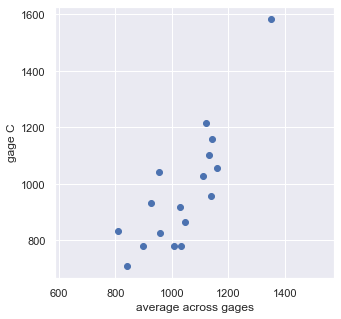

In [17]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.scatter(data2.AVG, data2.C)
plt.xlabel('average across gages')
plt.ylabel('gage C');

This type of plot has a large dispersion, so it isn't convenient to spot anomalies.

Instead, we will plot a __double mass curve__. This plot  is created from the series of __accumulated precipitation__. This way, the plot must have always a positive and continues trend, allowing us to identity anomalies in the precipitation records.

```Python


# Ajustar la regresión lineal
b = curve_fit(linear_reg, data2.AVG, data2.C)[0][0]
b

fig, ax = plt.subplots(figsize=(5,5))

# configuración
ax.set_title('Serie de precipitación media anual (mm)', fontsize=14,
             fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(600, 1600), ylim=(600, 1600))

# diagrama de dispersión
ax.scatter(data2.AVG, data2.C)

# recta de regresión
ax.plot([0, 3000], [0, b * 3000], 'r--', linewidth=1)

# label one every five years
years = data2.index[::5]
xyear = [data2.loc[year, 'AVG'] + 10 for year in years]
yyear = [data2.loc[year, 'C'] - 20 for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

plt.tight_layout()
```

In [11]:
# annual series of accumulated precipitation
accData2 = data2.cumsum()
accData2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8


In [140]:
def linear_reg(x, m, n):
    """Linear regression with no intecept
    
    y = b * x   
    
    Input:
    ------
    x:         float. Independet value
    b:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = m * x + n
    
    return y

In [141]:
from scipy.optimize import curve_fit

In [143]:
[m , n], pcov = curve_fit(linear_reg, accData2.AVG, accData2.C)
m, n

(0.9396815850007384, 91.67709491191258)

In [148]:
[m], pcov = curve_fit(lambda x, m: linear_reg(x, m, n=0), accData2.AVG, accData2.C)
m

0.9472720120775414

In [110]:
np.polyfit(accData2.AVG, accData2.C, 1)

array([ 0.93968159, 91.6770946 ])

In [113]:
X = accData2.AVG.values.reshape(-1, 1)
y = accData2.C.values.reshape(-1, 1)
lr1 = LinearRegression(fit_intercept=False).fit(X, y)
m1 = lr1.coef_[0][0]
lr2 = LinearRegression(fit_intercept=True).fit(X, y)
m2 = lr2.coef_[0][0]
print(m1, m2)

0.9472720120806882 0.9396815850437893


In [35]:
from scipy.stats import linregress

In [40]:
from sklearn.linear_model import LinearRegression

In [86]:
X = accData2.AVG.values.reshape(-1, 1)
y = accData2.C.values.reshape(-1, 1)
lr = LinearRegression(fit_intercept=False).fit(X, y)
m = lr.coef_[0][0]
m

0.9472720120806882

In [67]:
x = np.array([0, 18000])
y = m * x

In [68]:
x, y

(array([    0, 18000]), array([    0.        , 17050.89621745]))

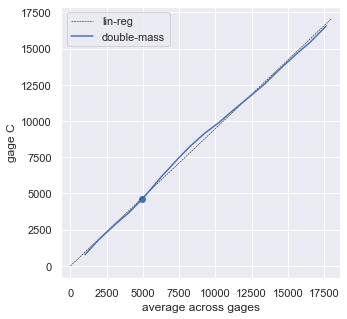

In [70]:
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot(x, y, linestyle='--', c='black', linewidth=.5, label='lin-reg')
plt.plot(accData2.AVG, accData2.C, label='double-mass')
plt.scatter(accData2.loc[1974, 'AVG'], accData2.loc[1974, 'C'])
plt.xlabel('average across gages')
plt.ylabel('gage C')
plt.legend();

In [95]:
thr = 0.1
df_1 = pd.DataFrame(index=accData2.index[4:-4], columns=['m1', 'n1', 'm2', 'n2', 'Am'])
# identify year with anomaly
for j, year in enumerate(accData2.index[4:-4]):
    # slope of the linear regression until j
    m1, n1 = np.polyfit(accData2.loc[:year, 'AVG'], accData2.loc[:year, 'C'], 1)
    # slope of the linear regression from j
    m2, n2 = np.polyfit(accData2.loc[year:, 'AVG'], accData2.loc[year:, 'C'], 1)
    # save fit
    df_1.loc[year,:] = [m1, n1, m2, n2, m1/m2]
    # there's an anomaly if the quotient between slopes exceeds a threshold
    if (m1 / m2 < 1 - thr) | (m1 / m2 > 1 + thr):
        print("Potential anomaly: year {0}".format(year))

Potential anomaly: year 1975
Potential anomaly: year 1976
Potential anomaly: year 1977
Potential anomaly: year 1978
Potential anomaly: year 1979


In [96]:
df_1

,m1,n1,m2,n2,Am
Year,,,,,
1974,0.953751,-120.614,0.90752,511.557,1.05094
1975,0.99647,-223.284,0.889223,762.713,1.12061
1976,1.01996,-287.564,0.879907,894.716,1.15916
1977,1.02932,-315.73,0.878315,917.902,1.17193
1978,1.02506,-301.368,0.884708,822.916,1.15864
1979,1.00846,-239.629,0.897753,624.443,1.12332
1980,0.994037,-181.43,0.90593,497.076,1.09726
1981,0.978987,-115.2,0.919882,275.417,1.06425
1982,0.964592,-46.3296,0.932261,74.56,1.03468


The analysis denotes a change in the slope starting in 1975. This means that there must have been a change in conditions in that year. Since we do not have further information to assess whether the correct series is before or after 1975, we'll correct the later according to the former.

In [106]:
# identify year with anomaly
df_2 = pd.DataFrame(index=accData2.index[4:-4], columns=['m1', 'm2', 'n2', 'Am'])
for j, year in enumerate(accData2.index[4:-4]):
    # slope of the linear regression until j
    X = accData2.loc[:year, 'AVG'].values.reshape(-1, 1)
    y = accData2.loc[:year, 'C'].values.reshape(-1, 1)
    lr1 = LinearRegression(fit_intercept=True).fit(X, y)
    m1 = lr1.coef_[0][0]
    #p1 = np.polyfit(accData.loc[:year, 'AVG'], accData.loc[:year, 'C'], 1)
    # slope of the linear regression from j
    X = accData2.loc[year + 1:, 'AVG'].values.reshape(-1, 1)
    y = accData2.loc[year + 1:, 'C'].values.reshape(-1, 1)
    lr2 = LinearRegression(fit_intercept=True).fit(X, y)
    m2, n2 = lr2.coef_[0][0], lr2.intercept_[0]
    #p2 = np.polyfit(accData.loc[year + 1:, 'AVG'], accData.loc[year + 1:, 'C'], 1)
    # save fit
    df_2.loc[year,:] = [m1, m2, n2, m1/m2]
    # there's an anomaly if the quotient between slopes is remarkable
    if (m1 / m2 < 1 - thr) | (m1 / m2 > 1 + thr):
        print("Potential anomaly: year {0}".format(year))

Potential anomaly: year 1975
Potential anomaly: year 1976
Potential anomaly: year 1977
Potential anomaly: year 1978
Potential anomaly: year 1979


In [107]:
df_2

,m1,m2,n2,Am
Year,,,,
1974,0.953751,0.889223,762.713,1.07257
1975,0.99647,0.879907,894.716,1.13247
1976,1.01996,0.878315,917.902,1.16126
1977,1.02932,0.884708,822.916,1.16346
1978,1.02506,0.897753,624.443,1.1418
1979,1.00846,0.90593,497.076,1.11318
1980,0.994037,0.919882,275.417,1.08061
1981,0.978987,0.932261,74.56,1.05012
1982,0.964592,0.925351,189.125,1.04241


In [12]:
# ajustar la regresión lineal
b = curve_fit(linear_reg, accData2.AVG, accData2.C)[0][0]
b

NameError: name 'curve_fit' is not defined

NameError: name 'b' is not defined

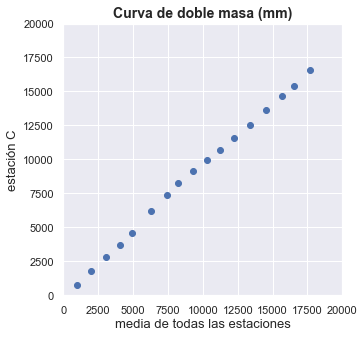

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000
thr = 0.1

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagrama de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')

# regresión lineal
ax.plot([0, lim], [0, b * lim], 'r--', linewidth=1)

# etiquetar uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')
          
plt.tight_layout()

In [ ]:
# identificar años con anomalía
for j, year in enumerate(accData2.index[4:-4]):
    # pendiente de la recta de regresión hasta 'year'
    p1 = np.polyfit(accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'], 1)
    # pendiente de la recta de regresión a partir de 'year'
    p2 = np.polyfit(accData2.loc[year + 1:, 'AVG'],
                    accData2.loc[year + 1:, 'C'], 1)
    # identificar como anomalía si el cociente de las pendientes se aleja de 1
    if (p1[0] / p2[0] < 1 - thr) | (p1[0] / p2[0] > 1 + thr):
        print("Potential anomaly: year {0}".format(year))

El análisis muestra un cambio en la pendiente a partir de 1976, lo que concuerda con el hecho de que la estación cambió de ubicación en 1974. Puesto que no disponemos de información para decidir si la serie correcta es la anterior o posterior a 1976, corregiremos los datos previos a dicha fecha.

In [ ]:
# año de la anomalía
year = 1976

In [ ]:
# pendiente antes de la anomalía
# ------------------------------
b_wrong = curve_fit(linear_reg, accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'])[0][0]
b_wrong

In [ ]:
# pendiente después de la anomalía
# --------------------------------
# extraer datos posteriores a la anomalía
temp = data2.loc[year + 1:, :].copy()
# calcular serie acumulada
accTemp = temp.cumsum(axis=0)    
# ajustar la regresión
b_right = curve_fit(linear_reg, accTemp.AVG, accTemp.C)[0][0]
b_right

In [ ]:
# corregir datos originales
# -------------------------
# crear columna para los datos corregidos
data2['C_c'] = data2.C
# corregir datos
data2.loc[:year, 'C_c'] = data2.loc[:year, 'C'] * b_right / b_wrong
# recalcular la serie acumulada
accData2 = data2.cumsum(axis=0)

In [ ]:
# GRÁFICO CON LA SERIE ORIGINAL Y LA CORREGIDA
# --------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagramas de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')
ax.scatter(accData2.AVG, accData2.C_c, marker='x', label='corregido')

# regresión linal
b = curve_fit(linear_reg, accData2.AVG, accData2.C_c)[0][0]
ax.plot([0, lim], [0, b * lim], 'r--', linewidth=1)

# etiquetas uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

ax.legend(loc=4, ncol=1, fontsize=13)
plt.tight_layout()

plt.savefig('../output/Ej2_curva de doble masas.png', dpi=300)

In [ ]:
# exportar datos corregidos
data2_c = data2.loc[:, ['A', 'B', 'C_c', 'D', 'E']]
data2_c.columns = ['A', 'B', 'C', 'D', 'E']
data2_c.to_csv('../output/Ej2_series corregidas.csv', float_format='%.0f')